In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [10]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 147ms/step - loss: 0.5392 - acc: 0.7743 - val_loss: 0.4229 - val_acc: 0.8581
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3469 - acc: 0.8919 - val_loss: 0.3343 - val_acc: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2626 - acc: 0.9165 - val_loss: 0.2928 - val_acc: 0.8879
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2147 - acc: 0.9301 - val_loss: 0.2779 - val_acc: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1822 - acc: 0.9407 - val_loss: 0.2897 - val_acc: 0.8845
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1538 - acc: 0.9509 - val_loss: 0.2778 - val_acc: 0.8866
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1331 - acc: 0.9593 - val_loss: 0.2923 - val_acc: 0.8837
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1172 - 

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
from keras import losses, optimizers
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

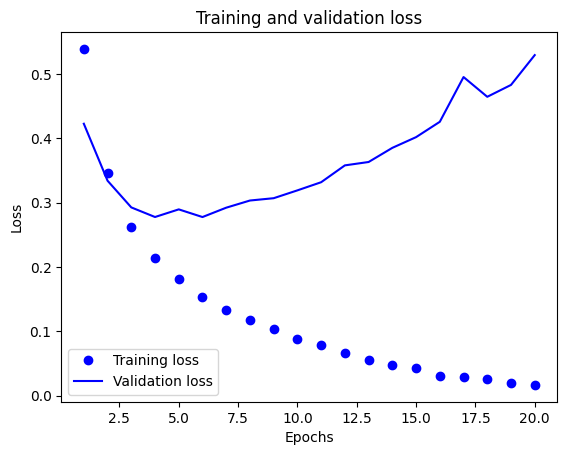

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

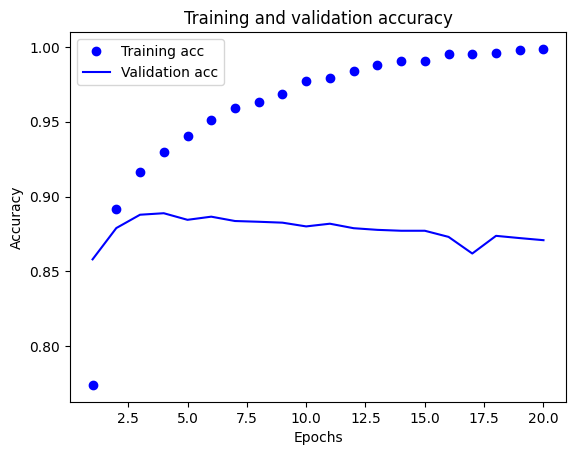

In [16]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()